José Delgado

# 4. Preprocessing

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data/training.csv')

## Split Features and Targets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Machine Failure', axis=1), df['Machine Failure'], test_size=0.3, random_state=1234)

## Rebalance Data

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
sm = SMOTE(random_state=1234)

In [19]:
X_train, y_train = sm.fit_resample(X_train, y_train)

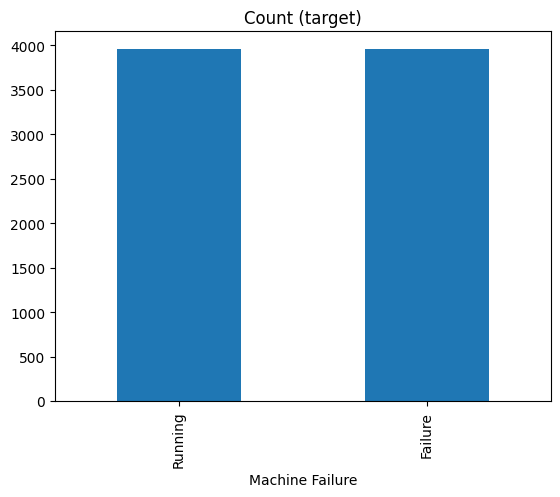

In [24]:
y_train.value_counts().plot(kind='bar', title='Count (target)')
plt.show()

# 5. Reducing Dimensionality

## Training a PCA Model

## Evaluating Components using a Scree Plot